In [1]:
#Importing all Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import warnings
warnings.filterwarnings("ignore")



In [2]:
titanic=pd.DataFrame(pd.read_csv("C:\\Users\\JAI HARISH\\Downloads\\Datasets\\titanic\\train.csv"))

## Exploratory Data Analysis

In [3]:
# Dropping Unwanted Columns
titanic.drop(['Name','PassengerId','Ticket'],axis=1,inplace=True)

In [4]:
null=titanic.isnull().mean().to_dict()
for keys in null.keys():
    i=np.round(null.get(keys),4)
    if i!=0:
        print("The {} has {}% of Missing values".format(keys,i))


The Age has 0.1987% of Missing values
The Cabin has 0.771% of Missing values
The Embarked has 0.0022% of Missing values


### Imputation Techniques
Cabin,Age,Embarked

##### Age is MCNR

In [5]:
#Age is Imputed using End of Distribution
end=np.round((np.std(titanic.Age)*3)+titanic.Age.mean())
titanic.Age.fillna(end,inplace=True)

#### Cabin and Embarked is MCR


In [6]:
#Embarked is Imputed using Frequency Imputation
titanic.Embarked.fillna(titanic.Embarked.mode().iloc[0],inplace=True)
#Cabin is Imputed nan values by replacing Missing 
titanic['Cabin_imp']=titanic.Cabin.fillna('Missing').astype(str).str[0]

### Remove Outliers using IQR

In [7]:
q1=np.percentile(titanic.Fare,.25)
q3=np.percentile(titanic.Fare,.75)
q1=titanic.Fare.quantile(.25)
q3=titanic.Fare.quantile(.75)
iqr=q3-q1
titanic_clear=titanic[~((titanic.Fare<(q1-1.5*iqr))|(titanic.Fare>(q3+1.5*iqr)))]

In [8]:
del titanic_clear['Cabin']
titanic_clear.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_imp
0,0,3,male,22.0,1,0,7.2500,S,M
2,1,3,female,26.0,0,0,7.9250,S,M
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,M
5,0,3,male,73.0,0,0,8.4583,Q,M


### Data Visualization  

#### Checking Correlation

<AxesSubplot:>

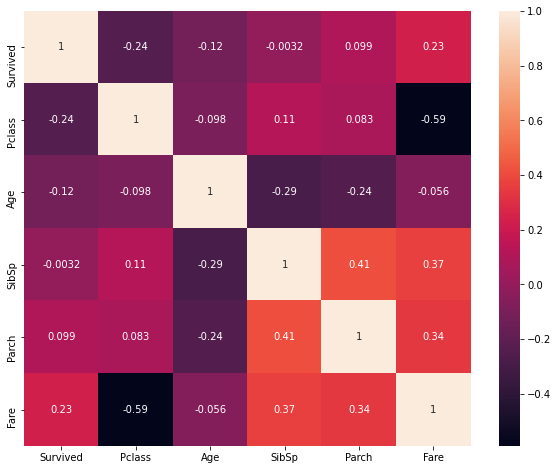

In [9]:
fig=plt.figure(figsize=(10,8))
sns.heatmap(titanic_clear.corr(),annot=True)

#### Analysing the Survival of people

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

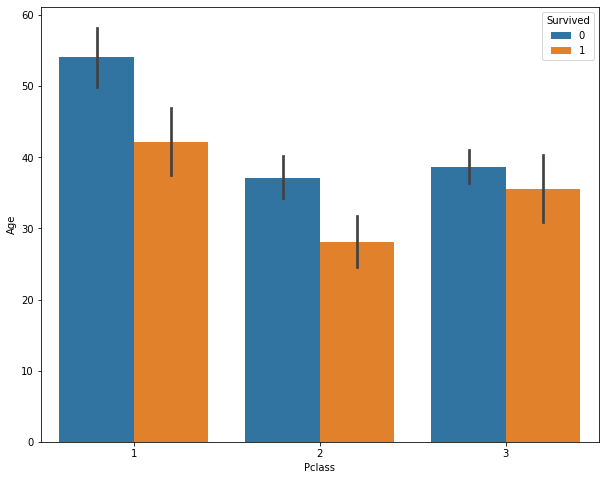

In [10]:
fig=plt.figure(figsize=(10,8))
sns.barplot(x=titanic_clear["Pclass"],y=titanic_clear["Age"],hue=titanic_clear["Survived"])

It says that people belongs to 1st class has Survived more than the other class people and Unsurvived people also higher than other classes  

<AxesSubplot:xlabel='Embarked', ylabel='Age'>

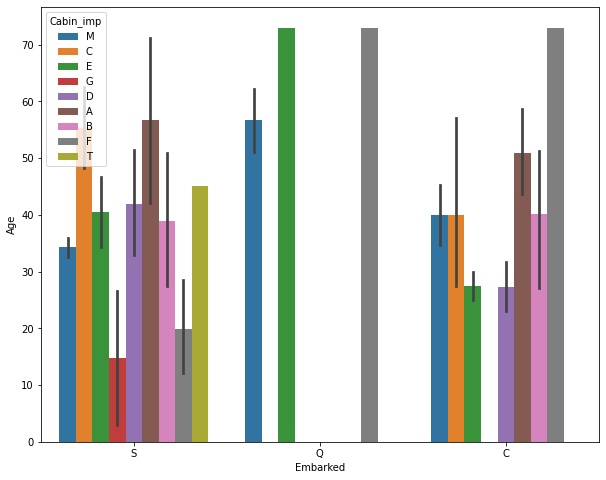

In [11]:
fig=plt.figure(figsize=(10,8))
sns.barplot(x=titanic_clear["Embarked"],y=titanic_clear["Age"],hue=titanic_clear["Cabin_imp"])

From above Datas,It Shows that More people Occupied all Cabins Embarked at S.  

#### Distribution of Numerical Features
It has Continuous and Discrete Distribution

In [12]:
discrete_num_distr=titanic_clear.dtypes[titanic_clear.dtypes=="int64"].index

#### Discrete Distribution plot

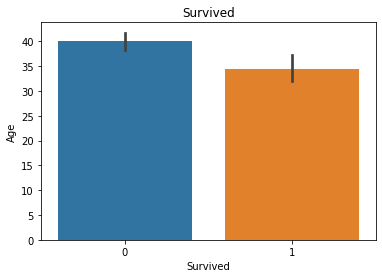

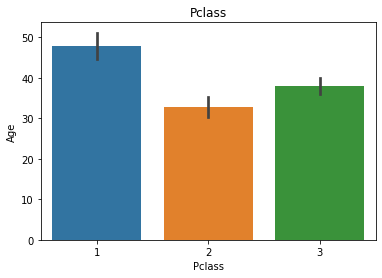

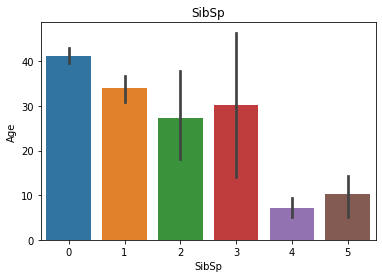

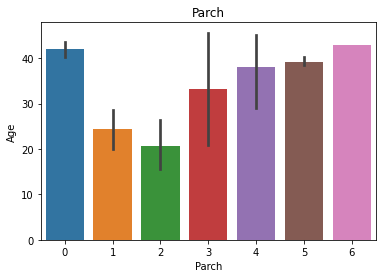

In [13]:
for i in discrete_num_distr:
    sns.barplot(x=titanic_clear[i],y=titanic_clear["Age"])
    plt.title(i)
    plt.show()

#### Continuous Numerical Distribution plot

In [14]:
conti_dis_feat=titanic_clear.dtypes[titanic_clear.dtypes=="float64"].index

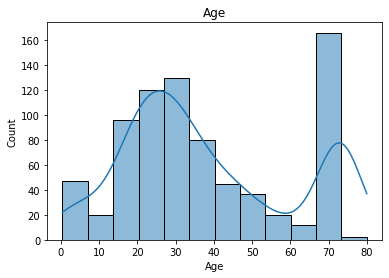

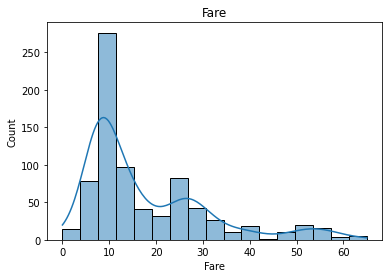

In [15]:
for i in conti_dis_feat:
    sns.histplot(titanic_clear[i],kde=True)
    plt.title(i)
    plt.show()

### Encoding  Categorical Features

#### Cabin is Ranked Manner 
It is Encoded using Mean Encoding

In [16]:
impu_1=titanic_clear.groupby(titanic_clear.Cabin_imp)['Survived'].mean().to_dict()
copy=impu_1
titanic_clear.Cabin_imp.replace(impu_1,inplace=True)


#### Embarked and Sex are Encoded using One hot Encoding

In [17]:
titanic_clear=pd.concat([pd.get_dummies(titanic_clear.Embarked,drop_first=True),titanic_clear],axis=1)
titanic_clear=pd.concat([pd.get_dummies(titanic_clear.Sex,drop_first=True),titanic_clear],axis=1)
titanic_clear.drop(['Sex','Embarked'],axis=1,inplace=True)

In [18]:
titanic_cleaned_data=titanic_clear

In [19]:
titanic_cleaned_data.head()

,male,Q,S,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_imp
0,1,0,1,0,3,22.0,1,0,7.2500,0.295008
2,0,0,1,1,3,26.0,0,0,7.9250,0.295008
3,0,0,1,1,1,35.0,1,0,53.1000,0.545455
4,1,0,1,0,3,35.0,0,0,8.0500,0.295008
5,1,1,0,0,3,73.0,0,0,8.4583,0.295008
